# Analyse des données EuroMillions

Ce notebook permet d'analyser les tirages historiques de l'EuroMillions à partir du fichier consolidé `loto_euromillions_all_clean.csv`.

## Objectifs
- Explorer la structure des données (2004-2026)
- Identifier les numéros et étoiles les plus fréquents
- Analyser les tendances sur 22 ans
- Visualiser les distributions
- Générer des suggestions de tirages

**Format EuroMillions** : 5 numéros (1-50) + 2 étoiles (1-12)

### 📝 Note sur les données

Les données proviennent de 6 fichiers sources fusionnés et nettoyés :
- **euromillions.csv** (378 tirages)
- **euromillions_2.csv** (286 tirages)  
- **euromillions_3.csv** (276 tirages)
- **euromillions_4.csv** (253 tirages)
- **euromillions_201902.csv** (97 tirages)
- **euromillions_202002.csv** (628 tirages)

**Total : 1918 tirages de 2004 à 2026 (22 ans d'historique trans-européen !)**

**Améliorations appliquées** :
- ✓ Suppression des colonnes vides
- ✓ Dates standardisées (YYYY-MM-DD)
- ✓ Nombres uniformisés
- ✓ Tri chronologique
- ✓ Types optimisés

## 1. Import des bibliothèques

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

# Configuration pour de meilleurs graphiques
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


## 2. Chargement des données

In [22]:
# Charger le fichier CSV nettoyé
df = pd.read_csv('data/loto_euromillions_all_clean.csv', sep=';', low_memory=False)

print(f"Nombre de tirages : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"Période couverte : {df['date_de_tirage'].min()} à {df['date_de_tirage'].max()}")
print(f"\n22 ANS D'EUROMILLIONS ! 🇪🇺🎉")
print(f"\nPremières lignes du dataset :")
df.head()

Nombre de tirages : 1918
Nombre de colonnes : 117
Période couverte : 1 à Super Jackpot et tirages suivants

22 ANS D'EUROMILLIONS ! 🇪🇺🎉

Premières lignes du dataset :


,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,...,nombre_de_gagnant_au_rang7_Etoile+,rapport_du_rang7_Etoile+,nombre_de_gagnant_au_rang8_Etoile+,rapport_du_rang8_Etoile+,nombre_de_gagnant_au_rang9_Etoile+,rapport_du_rang9_Etoile+,nombre_de_gagnant_au_rang10_Etoile+,rapport_du_rang10_Etoile+,numero_Tirage_Exceptionnel_Euro_Millions,numero_Tirage_Exceptionnel_Euro_Million
0,2004001,VE,2004-02-13,2004-04-15,32,16,29,41,36,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004002,VE,2004-02-20,2004-04-22,13,50,47,7,39,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004003,VE,2004-02-27,2004-04-29,37,19,18,14,31,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004004,VE,2004-03-05,2004-05-06,39,37,4,7,33,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004005,VE,2004-03-12,2004-05-13,44,47,15,28,24,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Analyse des numéros principaux (1-50)

In [23]:
# Collecter tous les numéros des 5 boules principales
all_numbers = []

for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
    if col in df.columns:
        numbers = df[col].dropna()
        all_numbers.extend(numbers.astype(int).tolist())

# Compter les occurrences
number_counts = Counter(all_numbers)
most_common = number_counts.most_common(10)

print(f"ANALYSE SUR {len(all_numbers)} NUMÉROS TIRÉS (22 ans) !")
print(f"\nLes 10 numéros les plus fréquents :")
for num, count in most_common:
    freq = (count / len(all_numbers)) * 100
    print(f"Numéro {num:2d} : {count:4d} fois ({freq:.2f}%)")
    
print(f"\nFréquence théorique attendue : {len(all_numbers) / 50:.1f} fois par numéro")

ANALYSE SUR 9590 NUMÉROS TIRÉS (22 ans) !

Les 10 numéros les plus fréquents :
Numéro 10 :  219 fois (2.28%)
Numéro 42 :  213 fois (2.22%)
Numéro 11 :  213 fois (2.22%)
Numéro 23 :  212 fois (2.21%)
Numéro  4 :  212 fois (2.21%)
Numéro  7 :  210 fois (2.19%)
Numéro  3 :  209 fois (2.18%)
Numéro 44 :  208 fois (2.17%)
Numéro  9 :  208 fois (2.17%)
Numéro 21 :  208 fois (2.17%)

Fréquence théorique attendue : 191.8 fois par numéro


## 4. Analyse des étoiles (1-12)

In [24]:
# Collecter toutes les étoiles
all_stars = []

for col in ['etoile_1', 'etoile_2']:
    if col in df.columns:
        stars = df[col].dropna()
        all_stars.extend(stars.astype(int).tolist())

# Compter les occurrences
star_counts = Counter(all_stars)
most_common_stars = star_counts.most_common(12)

print(f"ANALYSE SUR {len(all_stars)} ÉTOILES TIRÉES !")
print(f"\nLes étoiles les plus fréquentes :")
for num, count in most_common_stars:
    freq = (count / len(all_stars)) * 100
    print(f"Étoile {num:2d} : {count:4d} fois ({freq:.2f}%)")
    
print(f"\nFréquence théorique attendue : {len(all_stars) / 12:.1f} fois par étoile")

ANALYSE SUR 3583 ÉTOILES TIRÉES !

Les étoiles les plus fréquentes :
Étoile  2 :  359 fois (10.02%)
Étoile  3 :  354 fois (9.88%)
Étoile  8 :  345 fois (9.63%)
Étoile  5 :  326 fois (9.10%)
Étoile  7 :  326 fois (9.10%)
Étoile  6 :  326 fois (9.10%)
Étoile  9 :  324 fois (9.04%)
Étoile  1 :  309 fois (8.62%)
Étoile  4 :  275 fois (7.68%)
Étoile 10 :  255 fois (7.12%)
Étoile 11 :  234 fois (6.53%)
Étoile 12 :  150 fois (4.19%)

Fréquence théorique attendue : 298.6 fois par étoile


## 5. Visualisations

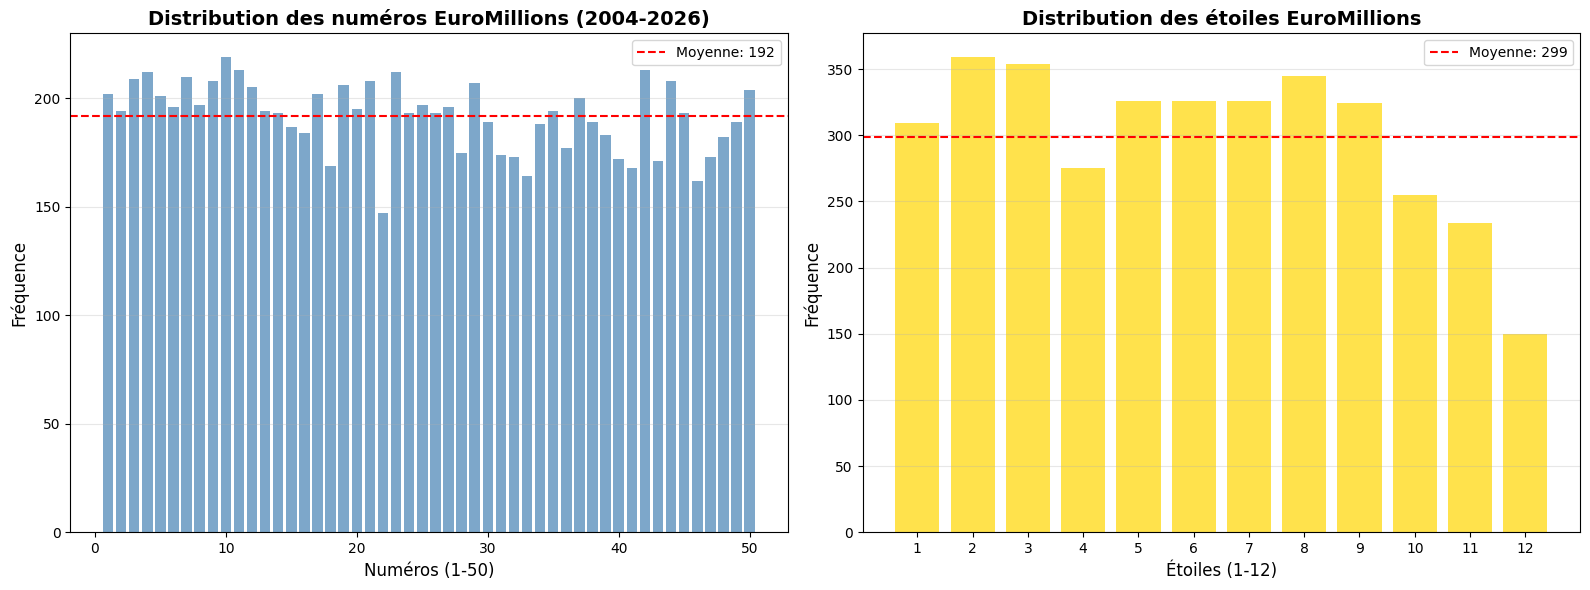

In [25]:
# Distribution des 50 numéros
all_numbers_freq = [number_counts.get(i, 0) for i in range(1, 51)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graphique des numéros
ax1.bar(range(1, 51), all_numbers_freq, color='steelblue', alpha=0.7)
ax1.axhline(y=np.mean(all_numbers_freq), color='red', linestyle='--', 
            label=f'Moyenne: {np.mean(all_numbers_freq):.0f}')
ax1.set_xlabel('Numéros (1-50)', fontsize=12)
ax1.set_ylabel('Fréquence', fontsize=12)
ax1.set_title('Distribution des numéros EuroMillions (2004-2026)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Graphique des étoiles
all_stars_freq = [star_counts.get(i, 0) for i in range(1, 13)]
ax2.bar(range(1, 13), all_stars_freq, color='gold', alpha=0.7)
ax2.axhline(y=np.mean(all_stars_freq), color='red', linestyle='--', 
            label=f'Moyenne: {np.mean(all_stars_freq):.0f}')
ax2.set_xlabel('Étoiles (1-12)', fontsize=12)
ax2.set_ylabel('Fréquence', fontsize=12)
ax2.set_title('Distribution des étoiles EuroMillions', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

## 6. Statistiques descriptives

In [26]:
# Statistiques sur les numéros
stats_numbers = pd.DataFrame({
    'Numéros (1-50)': [
        np.mean(all_numbers),
        np.median(all_numbers),
        np.std(all_numbers),
        len(all_numbers),
        len(set(all_numbers))
    ],
    'Étoiles (1-12)': [
        np.mean(all_stars),
        np.median(all_stars),
        np.std(all_stars),
        len(all_stars),
        len(set(all_stars))
    ]
}, index=['Moyenne', 'Médiane', 'Écart-type', 'Total tirages', 'Valeurs distinctes'])

print("Statistiques sur 22 ans d'EuroMillions :")
stats_numbers

Statistiques sur 22 ans d'EuroMillions :


,Numéros (1-50),Étoiles (1-12)
Moyenne,24.988217,6.044376
Médiane,25.000000,6.000000
Écart-type,14.513335,3.257741
Total tirages,9590.000000,3583.000000
Valeurs distinctes,50.000000,12.000000


## 7. Génération de suggestions de tirage

⚠️ **DISCLAIMER IMPORTANT** : L'EuroMillions est un jeu de hasard pur. Chaque tirage est indépendant. Probabilité de gagner le rang 1 : environ **1 sur 139 millions** !

Les suggestions ci-dessous sont basées sur des **stratégies statistiques** sur 22 ans de données européennes à titre illustratif uniquement.

In [27]:
# Stratégie 1 : Numéros et étoiles "chauds"
print("🔥 STRATÉGIE 1 : Les plus fréquents sur 22 ans (\"chauds\")")
print("="*60)

hot_numbers = [num for num, count in number_counts.most_common(15)]
tirage_hot = sorted(random.sample(hot_numbers, 5))

hot_stars = [num for num, count in star_counts.most_common(6)]
etoiles_hot = sorted(random.sample(hot_stars, 2))

print(f"Numéros : {tirage_hot}")
print(f"Étoiles : {etoiles_hot}")
print(f"Tirage complet : {tirage_hot} + Étoiles {etoiles_hot}")
print(f"\n📊 Basé sur les numéros/étoiles les plus tirés depuis 2004")

🔥 STRATÉGIE 1 : Les plus fréquents sur 22 ans ("chauds")
Numéros : [1, 3, 4, 12, 19]
Étoiles : [3, 5]
Tirage complet : [1, 3, 4, 12, 19] + Étoiles [3, 5]

📊 Basé sur les numéros/étoiles les plus tirés depuis 2004


In [28]:
# Stratégie 2 : Distribution équilibrée
print("\n⚖️ STRATÉGIE 2 : Distribution équilibrée")
print("="*60)

# Zones pour les numéros (1-50)
zones = {
    'bas': list(range(1, 13)),
    'moyen_bas': list(range(13, 26)),
    'moyen_haut': list(range(26, 38)),
    'haut': list(range(38, 51))
}

tirage_equilibre = []
for zone_nums in zones.values():
    tirage_equilibre.append(random.choice(zone_nums))

tirage_equilibre.append(random.randint(1, 50))
tirage_equilibre = sorted(list(set(tirage_equilibre))[:5])

while len(tirage_equilibre) < 5:
    num = random.randint(1, 50)
    if num not in tirage_equilibre:
        tirage_equilibre.append(num)

tirage_equilibre = sorted(tirage_equilibre)

# Étoiles équilibrées
etoiles_equilibre = sorted(random.sample(range(1, 13), 2))

print(f"Numéros : {tirage_equilibre}")
print(f"Étoiles : {etoiles_equilibre}")
print(f"Tirage complet : {tirage_equilibre} + Étoiles {etoiles_equilibre}")
print(f"\n📊 Mélange équilibré de toutes les zones")


⚖️ STRATÉGIE 2 : Distribution équilibrée
Numéros : [5, 15, 29, 39, 44]
Étoiles : [4, 8]
Tirage complet : [5, 15, 29, 39, 44] + Étoiles [4, 8]

📊 Mélange équilibré de toutes les zones


In [29]:
# Stratégie 3 : Pondération par fréquence (22 ans)
print("\n🎲 STRATÉGIE 3 : Tirage pondéré par fréquence historique")
print("="*60)

# Numéros pondérés
weighted_pool = []
for num in range(1, 51):
    freq = number_counts.get(num, 1)
    weighted_pool.extend([num] * freq)

tirage_pondere = []
temp_pool = weighted_pool.copy()
while len(tirage_pondere) < 5:
    num = random.choice(temp_pool)
    if num not in tirage_pondere:
        tirage_pondere.append(num)
    temp_pool = [n for n in temp_pool if n != num]

tirage_pondere = sorted(tirage_pondere)

# Étoiles pondérées
star_weighted_pool = []
for num in range(1, 13):
    freq = star_counts.get(num, 1)
    star_weighted_pool.extend([num] * freq)

etoiles_pondere = []
temp_star_pool = star_weighted_pool.copy()
while len(etoiles_pondere) < 2:
    num = random.choice(temp_star_pool)
    if num not in etoiles_pondere:
        etoiles_pondere.append(num)
    temp_star_pool = [n for n in temp_star_pool if n != num]

etoiles_pondere = sorted(etoiles_pondere)

print(f"Numéros : {tirage_pondere}")
print(f"Étoiles : {etoiles_pondere}")
print(f"Tirage complet : {tirage_pondere} + Étoiles {etoiles_pondere}")
print(f"\n📊 Probabilité proportionnelle aux 22 ans d'historique européen")


🎲 STRATÉGIE 3 : Tirage pondéré par fréquence historique
Numéros : [11, 15, 33, 40, 45]
Étoiles : [1, 12]
Tirage complet : [11, 15, 33, 40, 45] + Étoiles [1, 12]

📊 Probabilité proportionnelle aux 22 ans d'historique européen


In [30]:
# Stratégie 4 : Mix intelligent (recommandé)
print("\n✨ STRATÉGIE 4 : Mix intelligent (RECOMMANDATION)")
print("="*60)

# 3 numéros parmi les top 20 + 2 autres
top_frequent = [num for num, count in number_counts.most_common(20)]
tirage_mix = random.sample(top_frequent, 3)

medium_nums = [num for num in range(1, 51) if num not in top_frequent[:10]]
tirage_mix.extend(random.sample(medium_nums, 2))
tirage_mix = sorted(tirage_mix)

# Étoiles : 1 fréquente + 1 moyenne
top_stars = [num for num, count in star_counts.most_common(6)]
etoiles_mix = [random.choice(top_stars)]
other_stars = [num for num in range(1, 13) if num not in etoiles_mix]
etoiles_mix.append(random.choice(other_stars))
etoiles_mix = sorted(etoiles_mix)

print(f"Numéros : {tirage_mix}")
print(f"Étoiles : {etoiles_mix}")
print(f"Tirage complet : {tirage_mix} + Étoiles {etoiles_mix}")
print(f"\n📊 Combine 22 ans de fréquences européennes et variété")


✨ STRATÉGIE 4 : Mix intelligent (RECOMMANDATION)
Numéros : [11, 12, 23, 33, 47]
Étoiles : [6, 12]
Tirage complet : [11, 12, 23, 33, 47] + Étoiles [6, 12]

📊 Combine 22 ans de fréquences européennes et variété


### 🎯 Recommandation finale

La **Stratégie 4 (Mix intelligent)** est la plus équilibrée.

### ⚠️ Rappel CRITIQUE pour l'EuroMillions

**L'EuroMillions est un jeu de hasard extrêmement difficile** :
- Probabilité de gagner le rang 1 : **~1 sur 139 868 743** (beaucoup plus difficile que le loto !)
- Chaque numéro a 1/50 chance (~2%) et chaque étoile 1/12 (~8,3%)
- Les tirages passés n'influencent JAMAIS les tirages futurs
- **Même avec 22 ans de données européennes, aucune prédiction n'est possible**

**Jouez de manière responsable** et considérez ces suggestions comme un simple exercice statistique sur plus de deux décennies d'EuroMillions ! 🇪🇺🎲